In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: Planner-Inv
Current folders are:
Planner-Inv.0


In [3]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

In [4]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
        "_total_inv_goods_revenues_", "_total_cons_goods_revenues_",
       "_total_inv_goods_inventories_","_total_in_progress_inv_goods_inventories_",
       "_total_cons_goods_inventories_","_total_in_progress_cons_goods_inventories_", "_total_lost_production_",
       "_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_", "total_capQ_dynamic_"]

In [5]:
# series database
series={}
for name in names:
    k=0
    #which folder
    os.chdir("../"+folder+"."+str(k))
    #create the dataframe with the content of the folder with extension 0 (k value here)
    #for the 'name' series
    series[name]=pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None)

    for k in range(1,rankNum):   #add the same series from the other folders
        #which folder
        os.chdir("../"+folder+"."+str(k))
        series[name]=series[name].add(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

'_total_production_'

,0,1,2,3,4,5,6,7
0,418.461185,60.462901,78.515318,88.716570,106.114865,14.341699,120.593172,31.533000
1,449.352811,92.504490,165.958779,140.026384,176.880383,109.667735,216.036343,69.222951
2,393.428574,114.177659,144.768082,164.998225,189.747165,151.769306,253.208345,111.260778
3,442.441304,112.337677,95.899042,184.950195,232.002666,122.074966,339.875133,127.467760
4,408.414531,105.101675,142.792065,160.171215,243.203976,122.074966,448.718740,137.932643
...,...,...,...,...,...,...,...,...
259,818.024906,244.845985,190.678496,372.028013,357.057364,281.986514,654.460778,431.707560
260,783.893375,256.097041,187.472104,381.877301,383.002355,328.687635,588.951314,378.682117
261,774.229315,237.466407,214.950768,359.390161,334.327479,373.087102,622.578513,392.549297
262,783.230490,243.537451,270.622000,368.374437,349.401408,366.872657,644.572901,373.466611


'____________________________________________________________'

'_total_cost_of_production_'

,0,1,2,3,4,5,6,7
0,1580.444444,259.291667,245.180556,236.361111,316.625000,45.527778,337.777778,93.333333
1,1661.583333,407.458333,428.625000,375.708333,529.777778,329.041667,677.777778,200.000000
2,1575.152778,478.013889,405.694444,448.027778,567.027778,455.277778,893.333333,320.000000
3,1603.375000,497.416667,328.083333,530.930556,695.333333,500.805556,955.555556,426.666667
4,1541.638889,478.013889,405.694444,453.319444,726.375000,372.500000,1260.000000,417.777778
...,...,...,...,...,...,...,...,...
259,2993.319444,1012.472222,518.583333,1003.652778,1063.694444,989.194444,1840.000000,1400.000000
260,2845.152778,1021.291667,486.833333,1047.750000,1142.333333,1028.513889,1795.555556,1217.777778
261,2772.833333,1014.236111,553.861111,1007.180556,999.541667,1117.500000,1753.333333,1160.000000
262,2850.444444,1012.472222,721.430556,993.069444,1045.069444,1098.875000,1817.777778,1180.000000


'____________________________________________________________'

'_total_cost_of_unused_factors_'

,0,1,2,3,4,5,6,7
0,6220.188944,613.249428,1828.889105,686.059394,720.913341,832.107670,3377.198578,4201.214741
1,6139.050055,465.082761,1645.444660,546.712171,507.760563,548.593781,3037.198578,4094.548074
2,6225.480611,394.527206,1668.375216,474.392727,470.510563,422.357670,2821.643022,3974.548074
3,6197.258389,375.124428,1745.986327,391.489949,342.205008,376.829892,2759.420800,3867.881407
4,6258.994500,394.527206,1668.375216,469.101060,311.163341,505.135448,2454.976356,3876.770296
...,...,...,...,...,...,...,...,...
259,6214.810987,95.620205,1819.016205,299.916859,161.506436,293.262019,351.608562,756.087000
260,6372.403672,96.325741,1823.299371,262.566612,93.157343,252.344058,399.975326,937.846978
261,6423.932639,97.487714,1764.475371,260.913234,232.914675,156.869573,479.331003,1000.236963
262,6333.880844,86.188085,1609.874853,278.477377,184.373635,172.180744,411.648018,974.642947


'____________________________________________________________'

'_total_inv_goods_revenues_'

,0,1,2,3,4,5,6,7
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.0,148.760779,0.0,152.419919,0.0,0.000000,0.0,0.000000
2,0.0,386.143476,0.0,689.462257,0.0,0.000000,0.0,0.000000
3,0.0,837.745500,0.0,1112.173286,0.0,0.000000,0.0,0.000000
4,0.0,695.105890,0.0,555.624187,0.0,315.033613,0.0,0.000000
...,...,...,...,...,...,...,...,...
259,0.0,1534.499014,0.0,1873.494922,0.0,562.271071,0.0,2442.235393
260,0.0,1584.169475,0.0,1883.969701,0.0,1499.043653,0.0,1212.949030
261,0.0,1511.503175,0.0,1651.241069,0.0,409.904400,0.0,2535.635122
262,0.0,1440.919422,0.0,1880.078542,0.0,3246.402192,0.0,838.082503


'____________________________________________________________'

'_total_cons_goods_revenues_'

,0,1,2,3,4,5,6,7
0,1876.011698,0.0,274.848559,0.0,0.000000,0.0,0.000000,0.0
1,2403.042569,0.0,718.148680,0.0,335.433887,0.0,0.000000,0.0
2,2440.682914,0.0,733.608421,0.0,844.972986,0.0,0.000000,0.0
3,2501.947725,0.0,569.094281,0.0,510.940995,0.0,0.000000,0.0
4,2497.665652,0.0,697.112152,0.0,1236.031704,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
259,4644.881898,0.0,964.995658,0.0,489.350924,0.0,1825.472226,0.0
260,4496.212460,0.0,1097.611737,0.0,3397.636018,0.0,328.350266,0.0
261,4372.278887,0.0,965.722925,0.0,2364.652822,0.0,1636.238041,0.0
262,4385.006549,0.0,1297.446094,0.0,711.501702,0.0,2008.326410,0.0


'____________________________________________________________'

'_total_inv_goods_inventories_'

,0,1,2,3,4,5,6,7
0,0,0.000000,0,0.000000,0,0.000000,0,0.000000
1,0,139.700000,0,142.169444,0,0.000000,0,0.000000
2,0,345.149759,0,565.665887,0,0.000000,0,0.000000
3,0,792.041608,0,981.971605,0,0.000000,0,0.000000
4,0,644.883496,0,524.861636,0,218.533333,0,0.000000
...,...,...,...,...,...,...,...,...
259,0,1398.497822,0,1631.603455,0,497.424633,0,2597.101290
260,0,1425.188757,0,1643.787396,0,1237.593919,0,968.944362
261,0,1345.035496,0,1419.682595,0,372.331484,0,1824.311675
262,0,1297.804213,0,1657.999661,0,3240.478551,0,607.666038


'____________________________________________________________'

'_total_in_progress_inv_goods_inventories_'

,0,1,2,3,4,5,6,7
0,0,273.579167,0,307.269444,0,54.633333,0,121.333333
1,0,543.277778,0,653.520833,0,449.483333,0,381.333333
2,0,731.484722,0,708.554167,0,995.816667,0,788.666667
3,0,521.934722,0,476.955556,0,1119.983333,0,1109.333333
4,0,570.441667,0,745.243056,0,1343.483333,0,1594.666667
...,...,...,...,...,...,...,...,...
259,0,1086.555556,0,1341.437500,0,2890.600000,0,10842.000000
260,0,1105.958333,0,1332.265278,0,2791.266667,0,11850.222222
261,0,1076.854167,0,1385.005556,0,3998.166667,0,11532.444444
262,0,1129.241667,0,1313.920833,0,2175.400000,0,10114.000000


'____________________________________________________________'

'_total_cons_goods_inventories_'

,0,1,2,3,4,5,6,7
0,1655.056944,0,265.994444,0,0.000000,0,0.000000,0
1,2162.274146,0,639.974572,0,283.100000,0,0.000000,0
2,2135.751322,0,654.215729,0,603.327409,0,0.000000,0
3,2210.252990,0,490.757337,0,596.278752,0,0.000000,0
4,2162.419785,0,590.609761,0,955.951422,0,0.000000,0
...,...,...,...,...,...,...,...,...
259,4101.383261,0,940.938815,0,359.977410,0,1483.728893,0
260,3963.718940,0,930.491710,0,2536.943460,0,266.747409,0
261,3921.287022,0,914.183886,0,1697.286115,0,1706.069454,0
262,3969.238598,0,1171.539436,0,582.750900,0,1741.910760,0


'____________________________________________________________'

'_total_in_progress_cons_goods_inventories_'

,0,1,2,3,4,5,6,7
0,0.0,0,0.0,0,379.950000,0,439.111111,0
1,0.0,0,0.0,0,732.583333,0,1135.333333,0
2,0.0,0,0.0,0,869.166667,0,1822.888889,0
3,0.0,0,0.0,0,1147.300000,0,3065.111111,0
4,0.0,0,0.0,0,1318.650000,0,4703.111111,0
...,...,...,...,...,...,...,...,...
259,0.0,0,0.0,0,2336.816667,0,6809.111111,0
260,0.0,0,0.0,0,1204.416667,0,8490.444444,0
261,0.0,0,0.0,0,978.433333,0,9111.555556,0
262,0.0,0,0.0,0,1770.616667,0,10348.000000,0


'____________________________________________________________'

'_total_lost_production_'

,0,1,2,3,4,5,6,7
0,20.790015,2.284073,15.978110,0.000000,0.0,0.000000,0.000000,0.000000
1,18.148493,8.802529,0.000000,0.000000,0.0,0.000000,49.944392,0.000000
2,41.047412,7.215810,10.205898,0.127890,0.0,0.000000,129.642219,0.422972
3,14.964226,10.956891,30.722424,13.934121,0.0,133.557217,0.000000,64.727676
4,19.668522,15.251635,13.420353,10.806230,0.0,1.362768,0.000000,14.525594
...,...,...,...,...,...,...,...,...
259,52.182852,28.154392,10.743205,10.465303,0.0,146.654483,0.000000,358.054597
260,45.069571,11.353750,0.000000,32.705081,0.0,60.134612,179.224057,157.015263
261,24.667102,43.833909,0.776715,65.633865,0.0,0.000000,0.000000,44.671275
262,44.141471,25.000602,10.902009,6.385116,0.0,0.000000,0.000000,661.818000


'____________________________________________________________'

'_total_cost_of_lost_production_'

,0,1,2,3,4,5,6,7
0,75.847222,10.583333,40.569444,0.000000,0.0,0.000000,0.000000,0.000000
1,63.500000,33.888889,0.000000,0.000000,0.0,0.000000,124.444444,0.000000
2,142.875000,26.513889,26.458333,1.763889,0.0,0.000000,318.888889,5.555556
3,56.444444,44.152778,77.611111,35.277778,0.0,335.111111,0.000000,150.000000
4,68.791667,55.111111,37.041667,28.222222,0.0,4.138889,0.000000,38.888889
...,...,...,...,...,...,...,...,...
259,178.152778,104.236111,28.222222,26.458333,0.0,366.527778,0.000000,808.333333
260,155.222222,44.527778,0.000000,76.333333,0.0,150.027778,411.111111,364.444444
261,86.430556,138.875000,3.527778,149.944444,0.0,0.000000,0.000000,101.111111
262,156.986111,84.777778,28.222222,17.638889,0.0,0.000000,0.000000,1456.666667


'____________________________________________________________'

'_updatedLabor_'

,0,1,2,3,4,5,6,7
0,4181.0,493.0,1158.0,474.0,529.0,347.0,1636.0,2252.0
1,4181.0,493.0,1158.0,474.0,529.0,347.0,1636.0,2252.0
2,4181.0,493.0,1158.0,474.0,529.0,347.0,1636.0,2252.0
3,4181.0,493.0,1158.0,474.0,529.0,347.0,1636.0,2252.0
4,4181.0,493.0,1158.0,474.0,529.0,347.0,1636.0,2252.0
...,...,...,...,...,...,...,...,...
259,5094.0,619.0,1221.0,689.0,564.0,581.0,949.0,924.0
260,5076.0,614.0,1229.0,650.0,564.0,571.0,949.0,924.0
261,5070.0,603.0,1237.0,652.0,564.0,571.0,949.0,924.0
262,5070.0,603.0,1237.0,652.0,564.0,571.0,949.0,924.0


'____________________________________________________________'

'_updatedCapital_'

,0,1,2,3,4,5,6,7
0,236921.458170,24842.689823,59960.923216,29351.160314,33286.145970,34732.502032,136078.452379,133694.055748
1,236921.458170,24842.689823,59960.923216,29351.160314,33286.145970,34732.502032,136078.452379,133694.055748
2,236921.458170,24842.689823,59960.923216,29351.160314,33286.145970,34732.502032,136078.452379,133694.055748
3,236921.458170,24842.689823,59960.923216,29351.160314,33286.145970,34732.502032,136078.452379,133694.055748
4,236921.458170,24842.689823,59960.923216,29351.160314,33286.145970,34732.502032,136078.452379,133694.055748
...,...,...,...,...,...,...,...,...
259,269905.513051,32636.775773,71288.686097,40667.996439,43952.116978,45808.883783,81591.112226,80615.438534
260,269722.863622,32578.286743,71302.024269,40457.048042,43753.506010,46038.735680,84021.665636,80917.328519
261,269301.291616,32443.220092,71627.263136,40552.155555,43556.274285,45821.830492,83809.688429,80551.174701
262,269114.383059,32308.922270,71699.750488,40496.405623,43360.412225,45606.431589,84567.026082,80551.174701


'____________________________________________________________'

'total_capQ_dynamic_'

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
259,154.970740,17.120607,46.325552,17.575545,85.184978,18.733742,71.847958,46.331445
260,147.944670,14.705772,44.461249,6.250151,9.323603,47.921843,262.112117,75.360416
261,126.939118,7.973267,71.746171,32.887712,9.323603,8.990946,32.489567,17.120962
262,147.205241,7.958475,49.839678,19.752455,9.323603,8.990946,117.130848,48.920039


'____________________________________________________________'

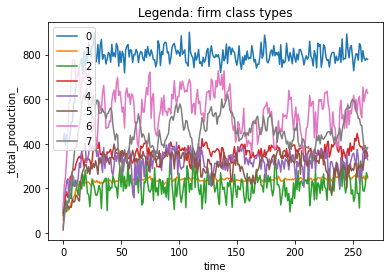

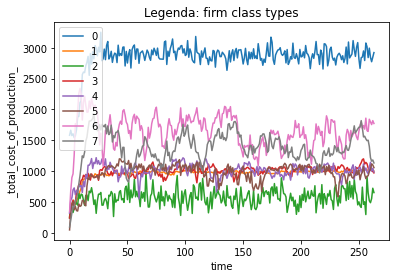

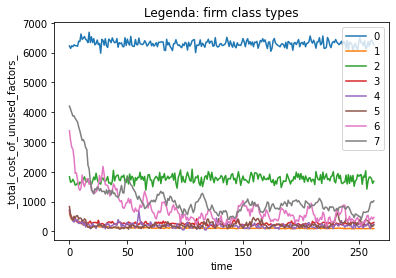

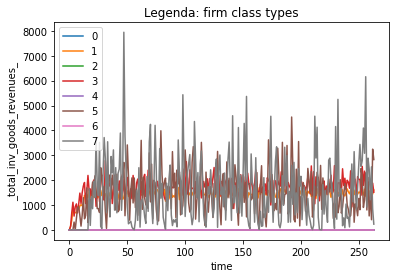

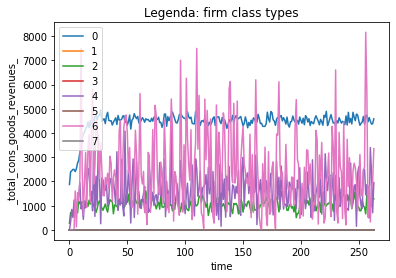

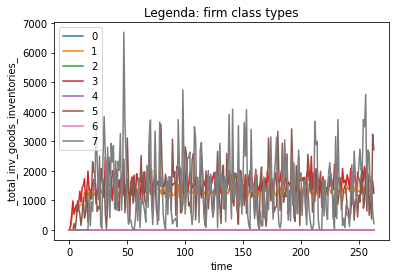

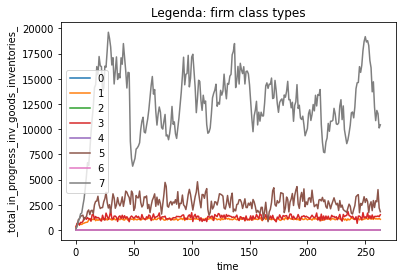

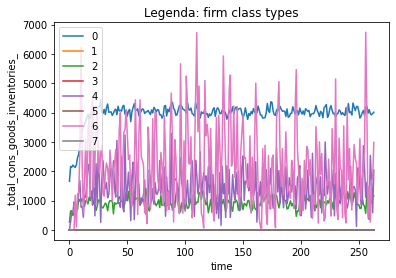

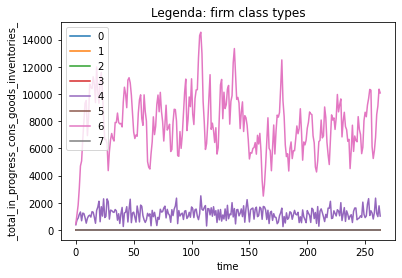

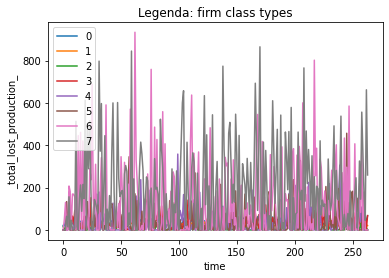

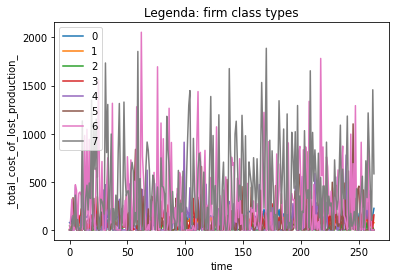

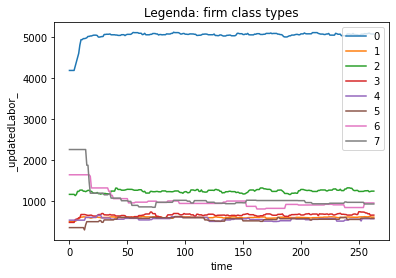

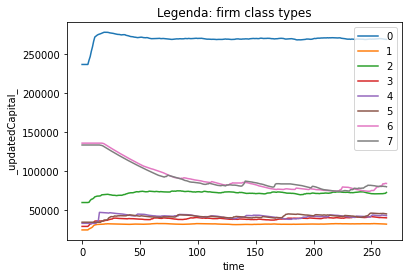

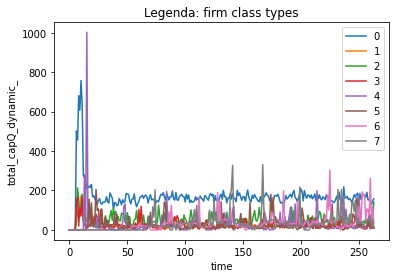

In [6]:
for name in names:
    display(name)
    display(series[name])
    display("____________________________________________________________")
    series[name].plot(title="Legenda: firm class types",xlabel="time",ylabel=name)